Install required Libraries

In [1]:
# STEP 1: Install & Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


Load and  display the Preprocess

In [2]:
# STEP 2: Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display dataset shape
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


CNN  model

In [3]:
#  STEP 3: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile  and Train the model of datasets

In [6]:
#  STEP 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# STEP 5: Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),verbose=2)



Epoch 1/10
1563/1563 - 78s - 50ms/step - accuracy: 0.4110 - loss: 1.6187 - val_accuracy: 0.5398 - val_loss: 1.2505
Epoch 2/10
1563/1563 - 80s - 51ms/step - accuracy: 0.5562 - loss: 1.2515 - val_accuracy: 0.6019 - val_loss: 1.1441
Epoch 3/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6136 - loss: 1.1073 - val_accuracy: 0.6504 - val_loss: 1.0064
Epoch 4/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6502 - loss: 1.0002 - val_accuracy: 0.6455 - val_loss: 1.0190
Epoch 5/10
1563/1563 - 84s - 54ms/step - accuracy: 0.6836 - loss: 0.9146 - val_accuracy: 0.6868 - val_loss: 0.8969
Epoch 6/10
1563/1563 - 75s - 48ms/step - accuracy: 0.7037 - loss: 0.8479 - val_accuracy: 0.7017 - val_loss: 0.8609
Epoch 7/10
1563/1563 - 85s - 54ms/step - accuracy: 0.7228 - loss: 0.7950 - val_accuracy: 0.7111 - val_loss: 0.8536
Epoch 8/10
1563/1563 - 73s - 47ms/step - accuracy: 0.7389 - loss: 0.7527 - val_accuracy: 0.7064 - val_loss: 0.8504
Epoch 9/10
1563/1563 - 83s - 53ms/step - accuracy: 0.7489 - loss: 0.7126 - val_a

Evaluating

In [8]:
#  STEP 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f" Final Test Accuracy: {test_acc:.4f}")


313/313 - 5s - 17ms/step - accuracy: 0.7047 - loss: 0.8680
 Final Test Accuracy: 0.7047


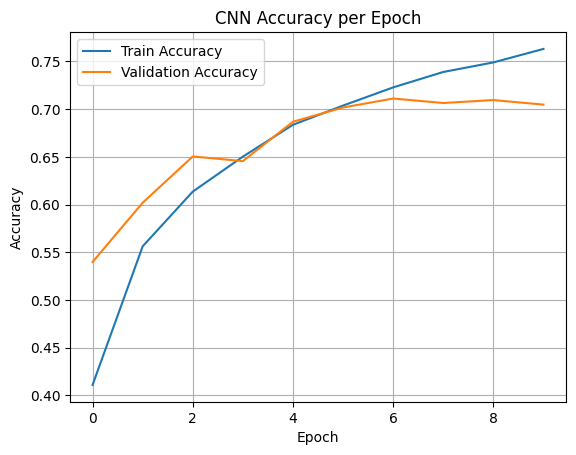

In [7]:
# STEP 7: Plot Accuracy Over Epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [10]:
# Transform: Normalize images to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:01<00:00, 103MB/s]


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = CNN()


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [14]:
epochs = 10
train_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    running_loss = 0.0
    net.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss_list.append(running_loss / len(trainloader))

# Evaluate on test data
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    val_acc_list.append(accuracy)

    print(f"Epoch {epoch+1}: Loss = {running_loss/len(trainloader):.4f}, Test Accuracy = {accuracy:.4f}")


Epoch 1: Loss = 1.5861, Test Accuracy = 0.5744
Epoch 2: Loss = 1.2255, Test Accuracy = 0.6518
Epoch 3: Loss = 1.0509, Test Accuracy = 0.6829
Epoch 4: Loss = 0.9370, Test Accuracy = 0.6923
Epoch 5: Loss = 0.8553, Test Accuracy = 0.7282
Epoch 6: Loss = 0.7836, Test Accuracy = 0.7240
Epoch 7: Loss = 0.7279, Test Accuracy = 0.7431
Epoch 8: Loss = 0.6728, Test Accuracy = 0.7520
Epoch 9: Loss = 0.6322, Test Accuracy = 0.7582
Epoch 10: Loss = 0.5843, Test Accuracy = 0.7470


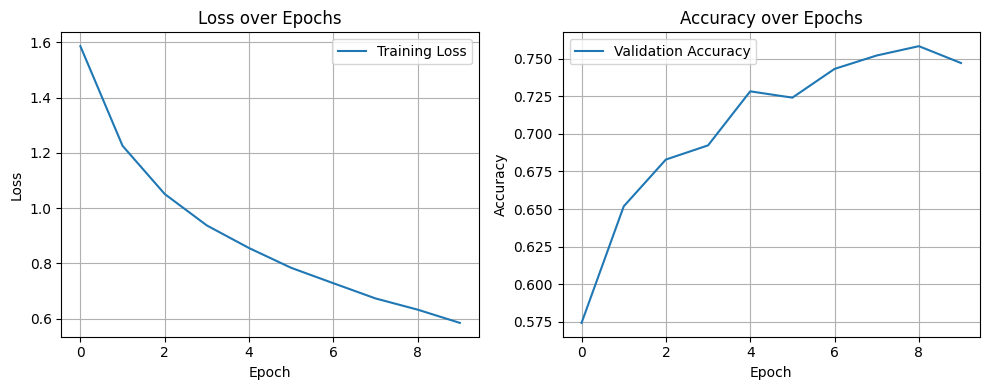

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss_list, label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(val_acc_list, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

# Show sample predictions
print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


Predicted:   dog  ship  ship plane
